<a href="https://colab.research.google.com/github/Carolinadmz/Portafolio/blob/main/Ejercicios/250304_MNIST_KERAS_TIN_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargar librerías
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #poner etiquetas, codificación OH
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
#Separar los datos de entrada y salida
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

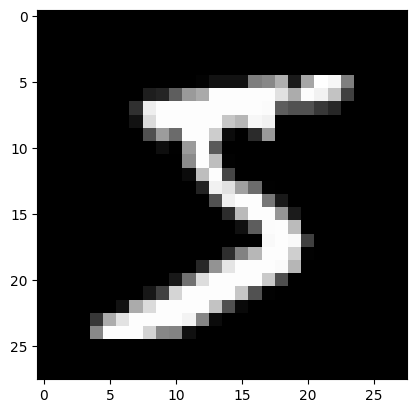

In [7]:
plt.imshow(x_train[0], cmap=plt.cm.gray)#flotear una imagen

In [8]:
y_train[0]

5

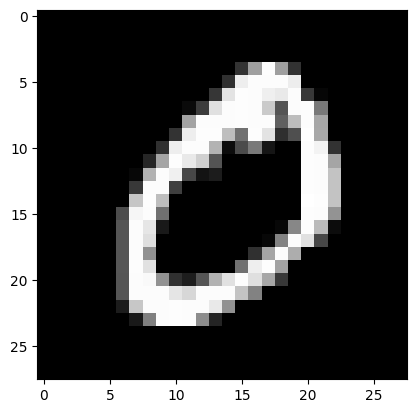

In [9]:
plt.imshow(x_train[1], cmap=plt.cm.gray)#flotear una imagen

In [10]:
y_train[1]

0

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [12]:
# Preprocesamiento de la base de datos(Normalizar) # pasar a decimales
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# Aplanar la matrix de datos, 28x28 es el tamaño de la imagen pero como es un cuadro no se puede meter entonces se multiplica para poder tener datos y meternlos en líena, que da 784, con 784 entradas
x_train = x_train.reshape((60000, -1)) #transforma la matrix, y el -1 para que todo quede en una línea
x_test = x_test.reshape((10000, -1))

In [15]:
x_train.shape

(60000, 784)

In [16]:
# Convertir a categorías las salidas
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
y_train[1] # ahora tengo 10 salidas

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
# Definir el modelo
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # Capa de entrada y primera capa oculta
model.add(Dense(256, activation='relu')) # Segunda capa oculta
model.add(Dense(10, activation='softmax')) # Capa de salida, convierte un vector de salida y lo convierte en probabilidades, solo de una salida, es obligatorio cuando tenemos multiples salidas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#Compilar el modelo, cross, calcula la diferencia entre el vector y el resultado OH, se usa porque tenemos softmax arriba
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Entrenar el modelo (sin GPU aprox 20s por epoca con gpu = ?)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80)

Epoch 1/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9033 - loss: 0.3169 - val_accuracy: 0.9638 - val_loss: 0.1092
Epoch 2/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9756 - loss: 0.0777 - val_accuracy: 0.9638 - val_loss: 0.1137
Epoch 3/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9817 - loss: 0.0560 - val_accuracy: 0.9748 - val_loss: 0.0828
Epoch 4/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9880 - loss: 0.0375 - val_accuracy: 0.9762 - val_loss: 0.0841
Epoch 5/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9908 - loss: 0.0279 - val_accuracy: 0.9803 - val_loss: 0.0765
Epoch 6/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9916 - loss: 0.0250 - val_accuracy: 0.9781 - val_loss: 0.0829
Epoch 7/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9807 - val_loss: 0.0764
Epoch 8/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9953 -

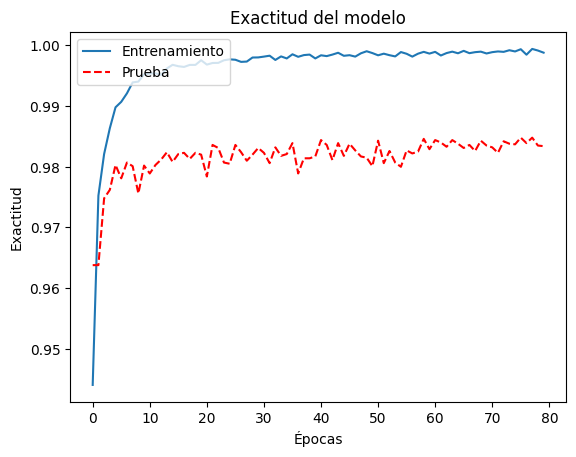

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura01.png', dpi=300)

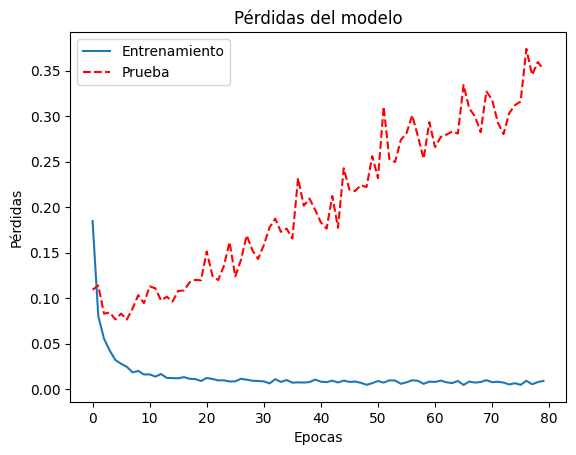

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Pérdidas del modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura02.png', dpi=300)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)